# Assignment #4: Examples of Description of Motion in Moving Frames

* This is Assignment#4 on Classical Mechanics. It is intended to give you some experience on representing motion in moving (non Inertial) frames.

* Save this file in your Institutional G-Suite google drive and rename it starting with your index number. For example if you are E/90/512 then rename the file to 
'E90512_Assignment#4_ExamplesMovingFrames.ipynb'

* Get started!

* Once complete share with smaithri@eng.pdn.ac.lk and chanakatb@eng.pdn.ac.lk

* Submit the link at the end of Lesson 4: 'Lesson on Examples of Description of Motion in Moving Frames'

* Upload the file through the Assignment Submission Link at the end of the Lesson.

#Setting Up

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math
from numpy import linalg
import sympy

from sympy import symbols
from sympy import *

import plotly.graph_objects as go
import plotly.express as px

In [2]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [3]:
md=mugas_dynamic_systems_simulation_functions()

# Q1 - A disk lying on a horizontal plane is rotating about a vertical axis at a constant angular rate of $\Omega$ (see figure below). A small spherical object of mass $m$ is constrained to move in a groove cut in the disk. It is connected to the pivot point of the disk through a spring of, spring constant $k$. Animate the motion of the bead as observed in 

* an Earth fixed frame 
* in a frame fixed to the disk

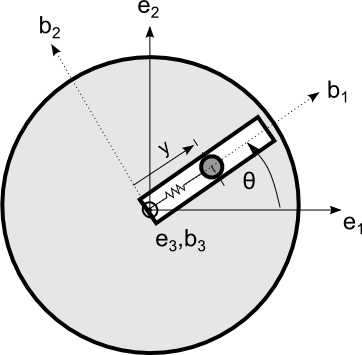

## Typical Answer

### Description of the motion of the bead with repect to the Earth fixed frame $\mathbf{e}$



Position in $\mathbf{e}$ frame.
\begin{align}
OP=\mathbf{e}\,\underbrace{\begin{bmatrix}y\cos{\theta} \\ y\sin{\theta}\\ 0
\end{bmatrix}}_{x}
\end{align}

Velocity in $\mathbf{e}$ frame

\begin{align}
\dot{x}=\begin{bmatrix}\dot{y}\cos{\theta}-y\,\dot{\theta}\sin{\theta} \\ \dot{y}\sin{\theta}+y\,\dot{\theta}\cos{\theta}\\ 0
\end{bmatrix}
\end{align}

Acceleration in $\mathbf{e}$ frame
\begin{align}
\ddot{x}=\begin{bmatrix}\ddot{y}\cos{\theta}-2\dot{y}\,\dot{\theta}\sin{\theta}-{y}\,\ddot{\theta}\sin{\theta}-{y}\,\dot{\theta}^2\cos{\theta} \\ \ddot{y}\sin{\theta}+2\dot{y}\,\dot{\theta}\cos{\theta}+y\,\ddot{\theta}\cos{\theta}-y\,\dot{\theta}^2\sin{\theta}\\ 0
\end{bmatrix}
\end{align}

Newton's equation in the $\mathbf{e}$ frame assuming that it is inertial is simply
\begin{align}
m\ddot{x}=f=
\begin{bmatrix}-k(y-y_0)\cos{\theta}\\-k(y-y_0)\sin{\theta}\\ 0
\end{bmatrix}+\begin{bmatrix}-N_2\sin{\theta}\\N_2\cos{\theta}\\ 0
\end{bmatrix}+\begin{bmatrix}0\\0\\-mg+N_3
\end{bmatrix}
\end{align}


\begin{align}
m(\ddot{y}\cos{\theta}-2\dot{y}\,\dot{\theta}\sin{\theta}-{y}\,\ddot{\theta}\sin{\theta}-{y}\,\dot{\theta}^2\cos{\theta}) &=-k(y-y_0)\cos{\theta}-N_2\sin{\theta}\\ 
m(\ddot{y}\sin{\theta}+2\dot{y}\,\dot{\theta}\cos{\theta}+y\,\ddot{\theta}\cos{\theta}-y\,\dot{\theta}^2\sin{\theta})&=-k(y-y_0)\sin{\theta}+N_2\cos{\theta}\\ 
0 &=-mg+N_3
\end{align}

From the above equations we find that the constraint forces are given by

\begin{align}
N_2&=2\dot{y}\,\dot{\theta}+\ddot{\theta}\,y\\ 
N_3 &=mg
\end{align}
and that the equations of motions are given by
\begin{align}
m\ddot{y}&=m\dot{\theta}^2\,y-k(y-y_0).
\end{align}

### Description motion of the bead with repect to the Disk fixed frame $\mathbf{b}$


\begin{align}
OP=\mathbf{b}\,\underbrace{\begin{bmatrix}y\\0\\0
\end{bmatrix}}_{X}
\end{align}

Velocity in the $\mathbf{b}$ frame

\begin{align}
\dot{X}=\begin{bmatrix}\dot{y}\\0\\0
\end{bmatrix}
\end{align}

Acceleration in the $\mathbf{b}$ frame

\begin{align}
\ddot{X}=\begin{bmatrix}\ddot{y}\\0\\0
\end{bmatrix}
\end{align}

Can we applyt Newton's equations in the $\mathbf{b}$ frame?

\begin{align}
m\ddot{X}&\neq \underbrace{\begin{bmatrix}-k(y-y_0)\\ 0\\ 0
\end{bmatrix}+\begin{bmatrix}0\\ N_2\\ 0
\end{bmatrix}+\begin{bmatrix}0\\ 0\\ -mg+N_3
\end{bmatrix}}_{F}=F
\end{align}

Equalit holds only if the disk is not rotating with respect to $\mathbf{e}$. That is only if $\mathbf{b}$ is fixed with respect to $\mathbf{e}$.

However we know $x(t)=RX$ where in this case $R=R_3(\theta)$ where we will see below that
\begin{align}
R_3{(\theta)}=\left[\begin{array}{ccc}
\cos{\theta} & -\sin{\theta} & 0\\
\sin{\theta} & \cos{\theta} &0\\
0 & 0 & 1
\end{array}\right].
\end{align} 

Now differentiating $x(t)=RX$ and noting that $R^T\dot{R}=\widehat{\Omega}$ is a skew symmetric matrix (see below questions) we have
\begin{align}
\dot{x}&=R\left(\widehat{\Omega}X+\dot{X}\right),\\
\ddot{x}&=R\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)
\end{align}
If we assume that $\mathbf{e}$ is an inertial frame then $m\ddot{x}=f$ where saw above that
\begin{align}
f=\begin{bmatrix}-k(y-y_0)\cos{\theta}\\-k(y-y_0)\sin{\theta}\\ 0
\end{bmatrix}+\begin{bmatrix}-N_2\sin{\theta}\\N_2\cos{\theta}\\ 0
\end{bmatrix}+\begin{bmatrix}0\\0\\-mg+N_3
\end{bmatrix}
\end{align}
Thus we have 
\begin{align}
m\ddot{x}&=mR\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)=f
\end{align}
and hence that
\begin{align}
m \ddot{X}=-mR\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X\right)+R^Tf
\end{align}
Notice that
\begin{align}
R^Tf&= \begin{bmatrix}-k(y-y_0)\\ 0\\ 0
\end{bmatrix}+\begin{bmatrix}0\\ N_2\\ 0
\end{bmatrix}+\begin{bmatrix}0\\ 0\\ -mg+N_3
\end{bmatrix}=F
\end{align}
is the $\mathbf{b}$ frame representation of the resultant interaction force on the object.

Thus we finally have 
\begin{align}
m \ddot{X}=-m\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X\right)+F
\end{align}

Below we will see that
\begin{align}
R_3^T\dot{R}_3=\widehat{\Omega}=\dot{\theta}\left[\begin{array}{ccc}
0 & -1 & 0\\
1 & 0 &0\\
0 & 0 & 0
\end{array}\right]\\
\widehat{\Omega}^2=-\dot{\theta}^2\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{array}\right].
\end{align}

Thus
\begin{align}
\widehat{\Omega}\dot{X}=\dot{\theta}\left[\begin{array}{ccc}
0 & -1 & 0\\
1 & 0 &0\\
0 & 0 & 0
\end{array}\right]\begin{bmatrix}\dot{y}\\0\\0
\end{bmatrix}=\begin{bmatrix}0\\\dot{\theta}\dot{y}\\0
\end{bmatrix}\\
\widehat{\Omega}^2X=-\dot{\theta}^2\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{array}\right]\begin{bmatrix}{y}\\0\\0
\end{bmatrix}=\begin{bmatrix}-{y}\dot{\theta}^2\\0\\0
\end{bmatrix}.
\end{align}

Thus we have
\begin{align}
m\begin{bmatrix}\ddot{y}\\0\\0
\end{bmatrix}&=
-m\left(\begin{bmatrix}-{y}\dot{\theta}^2\\0\\0
\end{bmatrix}
+2\begin{bmatrix}0\\\dot{\theta}\dot{y}\\0
\end{bmatrix} +\begin{bmatrix}0\\\ddot{\theta}{y}\\0
\end{bmatrix} \right)+\begin{bmatrix}-k(y-y_0)\\ N_2\\ -mg+N_3
\end{bmatrix}
\end{align}
\begin{align}
m\begin{bmatrix}\ddot{y}\\0\\0
\end{bmatrix}&=
\underbrace{-m\begin{bmatrix}-{y}\dot{\theta}^2\\0\\0
\end{bmatrix}}_{Centrifugal}
\underbrace{-2m\begin{bmatrix}0\\\dot{\theta}\dot{y}\\0
\end{bmatrix}}_{Coriolis} \underbrace{-m\begin{bmatrix}0\\\ddot{\theta}{y}\\0
\end{bmatrix}}_{Euler}+\begin{bmatrix}-k(y-y_0)\\ N_2\\ -mg+N_3
\end{bmatrix}
\end{align}
This gives us again
\begin{align}
N_2&=2m\dot{y}\,\dot{\theta}+m\ddot{\theta}\,y\\ 
N_3 &=mg
\end{align}
and that the equations of motions are given by
\begin{align}
m\ddot{y}&=m\dot{\theta}^2\,y-k(y-y_0).
\end{align}


### The derivation of the Equations of motion for the Disk

We have seen that the conservation of linear momentum together with the observation that particle interaction align along the line joining the two particles imply that the angular momentum of a set of particles give us that the motion of the disk is governed by the equations:



\begin{align}
\mathbb{I}\dot{\Omega}&=\mathbb{I}{\Omega}\times \Omega +T^e,
\end{align}
where $T^e=X\times F$
\begin{align}
\mathbb{I}\triangleq \sum_{i=1}^n\mathbb{I}_i =\sum_{i=1}^n -m_i\widehat{X}_i^2=\sum_{i=1}^n m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right),
\end{align}

Let $\mathbb{I}=\mathrm{diag}(\mathbb{I}_1,\mathbb{I}_2,\mathbb{I}_3)$ then the rotation dynamics $\mathbb{I}\dot{\Omega}=\mathbb{I}{\Omega}\times \Omega +T^e$ are given by
\begin{align}
\begin{bmatrix}0\\ 0\\\mathbb{I}_3\ddot{\theta}\end{bmatrix}=\begin{bmatrix} 0 & 0 &0\\ 0 & 0 & -y\\
0 & y & 0
\end{bmatrix}
\begin{bmatrix} 0\\ -m(2\dot{y}\,\dot{\theta}+\ddot{\theta}\,y) \\0
\end{bmatrix}
\end{align}
which gives us
\begin{align}
\mathbb{I}_3\ddot{\theta}&=-my(2\dot{y}\,\dot{\theta}+\ddot{\theta}\,y)
\end{align}

Thus we have the equations of motion of the entire system are given by
\begin{align}
m\ddot{y}&=m\dot{\theta}^2\,y-k(y-y_0)\\
\mathbb{I}_3\ddot{\theta}&=-my(2\dot{y}\,\dot{\theta}+\ddot{\theta}\,y)
\end{align}

### Simulating the motion of the Bead in the $\mathbf{e}$ and $\mathbf{b}$ frames



#### The Dynamic System form of the above equations for the bead
Let $X_1=y$, $X_2=\dot{y}$, $X_3=\theta$, $X_4=\dot{\theta}$ and
\begin{align}
X=\begin{bmatrix}X_1\\X_2\\X_3\\X_4 \end{bmatrix},\:\:\:\:
f(X,t)=\begin{bmatrix}X_2\\X_4^2\,X_1 -\frac{k}{m}(X_1-y_0)\\
X_4\\ -\frac{2mX_1X_2X_4}{\mathbb{I}_3+mX_1^2}
\end{bmatrix}
\end{align}
Then the above system can be written down in the form
\begin{align}
\dot{X}=f(X,t).
\end{align}

In [ ]:
def beadInDiskSystemModel(X, t, sysParameters):
  X1=X[0]; X2=X[1]; X3=X[2]; X4=X[3];
  m=sysParameters[0]; k=sysParameters[1]; y0=sysParameters[2]; II3=sysParameters[3];
  dXdt=[X2, X4**2*X1-k*(X1-y0)/m, X4, -m*(2*X1*X2*X4)/(II3+m*X1**2)];
  return dXdt

In [ ]:
m=0.01; r=0.01; II3=0.5*m*r**2; k=4; y0=0.1;
[t,sol,fig]=md.simulateDySystem(beadInDiskSystemModel, 2,0.01, [0.05,0.,0.,16], [m,k,y0,II3], 'y(t) and \dot{y}(t) Vs t', 'Time / t', 'x')

#### Motion of the bead in the $\mathbf{b}$ frame

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  XX[i,:]=[y,0,0];

In [ ]:
fig=md.animate_particle_motion(XX,[[0,0.2],[-0.5,0.5],[-0.5,0.5]],'Motion Observed in the b-frame')

#### Motion of the bead in the $\mathbf{e}$ frame

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  theta=sol[i][2]
  R=np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
  y=sol[i][0]
  XX[i,:]=R @ [y,0,0];

In [ ]:
fig=md.animate_particle_motion(XX,[[-0.2,0.2],[-0.5,0.5],[-0.5,0.5]],'Motion in the e-frame')

#### Symbolic Computation of the Equations of Motion

In [ ]:
theta, dtheta, ddtheta, y, dy, ddy, d, m, k, g, N_1, N_2, N_3, T_1, T_2, T_3, II1, II2, II3=symbols('theta, dtheta, ddtheta, y, dy, ddy, d, m, k, g, N_1, N_2, N_3, T_1, T_2, T_3, II1, II2, II3');
II=Matrix([[II1,0,0],[0,II2,0],[0,0,II3]]);
X=Matrix([y,0,0]);
dX=Matrix([dy,0,0]);
ddX=Matrix([ddy,0,0]);
Fp=Matrix([-k*y,N_2,N_3-m*g]);
R=Matrix([[cos(theta), -sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
Omega=Matrix([0,0,dtheta])
dOmega=Matrix([0,0,ddtheta]);
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]]);
dhatOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
hatX=Matrix([[0, -X[2], X[1]],[X[2],0,-X[0]],[-X[1],X[0],0]]);
Fb=Matrix([0,-N_2,-N_3]);
Tb=Matrix([T_1,T_2,0]);
T=simplify(hatX @ Fb+Tb);

In [ ]:
latex(Fp)

'\\left[\\begin{matrix}- k y\\\\N_{2}\\\\N_{3} - g m\\end{matrix}\\right]'

In [ ]:
latex(hatOmega**2 @X + 2 *hatOmega @ dX+dhatOmega @ X+ddX)

'\\left[\\begin{matrix}ddy - dtheta^{2} y\\\\ddtheta y + 2 dtheta dy\\\\0\\end{matrix}\\right]'

\begin{align}
m\left[\begin{matrix}ddy - dtheta^{2} y\\ddtheta y + 2 dtheta dy\\0\end{matrix}\right]=
\left[\begin{matrix}- k y\\N_{2}\\N_{3} - g m\end{matrix}\right]
\end{align}




In [ ]:
latex(II@dOmega-T)

'\\left[\\begin{matrix}- T_{1}\\\\- N_{3} y - T_{2}\\\\II_{3} ddtheta + N_{2} y\\end{matrix}\\right]'

\begin{align}
\left[\begin{matrix}- T_{1}\\- N_{3} y - T_{2}\\II_{3} ddtheta + N_{2} y\end{matrix}\right]=0
\end{align}

# Q2 - Consider a ball of mass $m$ constrained to move as shown in the figure below. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{b}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis). Write down the equations of motion of the mass and simulate the system for various different initial conditions.

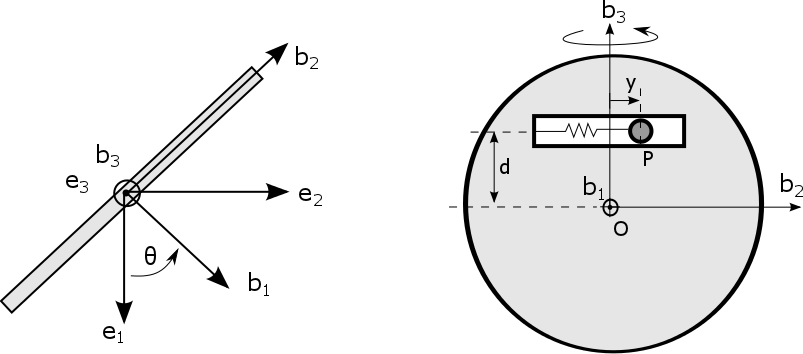

## Typical Answer

\begin{align}
\mathbf{b}=\mathbf{e}\underbrace{\begin{bmatrix} \cos{\theta} &-\sin{\theta} &0\\
\sin{\theta} & \cos{\theta} & 0\\
0 & 0 & 1
\end{bmatrix}}_{R}
\end{align}
\begin{align}
OP=\mathbf{e}x=\mathbf{b}\underbrace{\begin{bmatrix} 0\\ y\\d
\end{bmatrix}}_{X}=\mathbf{e}RX
\end{align}
Force acting on the bead.
\begin{align}
\mathbf{b}F=\mathbf{b}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3-mg
\end{bmatrix}}_{F}
\end{align}

\begin{align}
\dot{x}&=R(\widehat{\Omega}X+\dot{X}),\\
\ddot{x}&=R(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X})
\end{align}

#### Symbolic Computation of the Equations of Motion

In [ ]:
theta, dtheta, ddtheta, y, dy, ddy, d, m, k, g, N_1, N_2, N_3, T_1, T_2, T_3, II1, II2, II3=symbols('theta, dtheta, ddtheta, y, dy, ddy, d, m, k, g, N_1, N_2, N_3, T_1, T_2, T_3, II1, II2, II3');
II=Matrix([[II1,0,0],[0,II2,0],[0,0,II3]]);
X=Matrix([0,y,d]);
dX=Matrix([0,dy,0]);
ddX=Matrix([0,ddy,0]);
Fp=Matrix([N_1,-k*y,N_3-m*g]);
R=Matrix([[cos(theta), -sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
Omega=Matrix([0,0,dtheta])
dOmega=Matrix([0,0,ddtheta]);
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]]);
dhatOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
hatX=Matrix([[0, -X[2], X[1]],[X[2],0,-X[0]],[-X[1],X[0],0]]);
Fb=Matrix([-N_1,-k*y,-N_3]);
Tb=Matrix([T_1,T_2,0]);
T=simplify(hatX @ Fb+Tb);

In [ ]:
latex(Fp)

'\\left[\\begin{matrix}N_{1}\\\\- k y\\\\N_{3} - g m\\end{matrix}\\right]'

In [ ]:
latex(hatOmega**2 @X + 2 *hatOmega @ dX+dhatOmega @ X+ddX)

'\\left[\\begin{matrix}- ddtheta y - 2 dtheta dy\\\\ddy - dtheta^{2} y\\\\0\\end{matrix}\\right]'

\begin{align}
m\left[\begin{matrix}- ddtheta y - 2 dtheta dy\\ddy - dtheta^{2} y\\0\end{matrix}\right]=
\left[\begin{matrix}N_{1}\\- k y\\N_{3} - g m\end{matrix}\right]
\end{align}




In [ ]:
latex(II@dOmega-T)

'\\left[\\begin{matrix}N_{3} y - T_{1} - d k y\\\\N_{1} d - T_{2}\\\\II_{3} ddtheta - N_{1} y\\end{matrix}\\right]'

\begin{align}
\left[\begin{matrix}N_{3} y - T_{1} - d k y\\N_{1} d - T_{2}\\II_{3} ddtheta - N_{1} y\end{matrix}\right]=0
\end{align}

Thus the equations of motion are
\begin{align}
m\ddot{y}&=m\dot{\theta}^2\,y-ky\\
\mathbb{I}_3\ddot{\theta}&=-my(2\dot{y}\,\dot{\theta}+\ddot{\theta}\,y)
\end{align}

The simulations are similar to that of the previous question and can be re-produced here.

# Q3 - Consider a ball of mass $m$ constrained to move as shown in figure. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{c}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis) and about an axis through its centre that is perpendicular to the disk (that is about the $\mathbf{c}_1$ axis). Write down the equations of motion of the mass and simulate its motion for various different initial conditions.

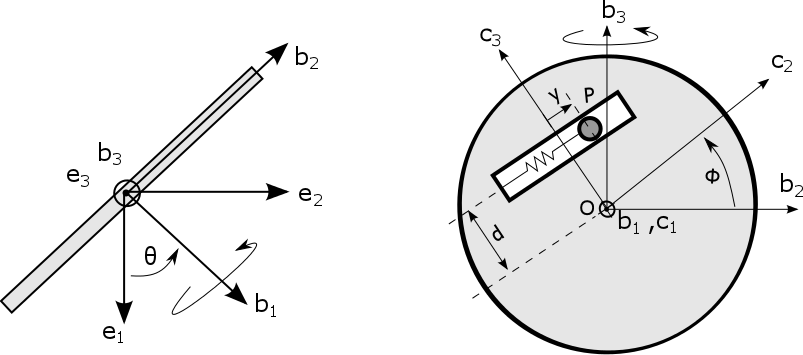

## Typical Answer

\begin{align}
\mathbf{b}&=\mathbf{e}\underbrace{\begin{bmatrix} \cos{\theta} &-\sin{\theta} &0\\
\sin{\theta} & \cos{\theta} & 0\\
0 & 0 & 1
\end{bmatrix}}_{R_3(\theta)}\\
\mathbf{c}&=\mathbf{b}\underbrace{\begin{bmatrix} 1 & 0 & 0\\0 & \cos{\phi} &-\sin{\phi}\\
0 & \sin{\phi} & \cos{\phi}
\end{bmatrix}}_{R_1(\phi)}
\end{align}
Thus 
\begin{align}
\mathbf{c}&=\mathbf{b}R_1=\mathbf{e}\underbrace{R_3R_1}_{R}
\end{align}

Thus the angular velcoty is given by
\begin{align}
\widehat{\Omega}&=R^T\dot{R}=\widehat{\Omega}_1+R_1^T\widehat{\Omega}_3R_1
\end{align}
and hence
\begin{align}
{\Omega}&={\Omega}_1+R_1^T{\Omega}_3=\begin{bmatrix}\dot{\phi} \\ \dot{\theta}\sin{\phi} \\ \dot{\theta}\cos{\phi}
\end{bmatrix}
\end{align}

We consider the system as a coupled system. The bead and the disk. Below we will write down the Newton's equations for the two systems seperately.


#### Newton's Equations of Motion for the Bead

Let the position of the center of mass of the bead be denoted by
\begin{align}
OP=\mathbf{e}\bar{x}_p=\mathbf{c}\underbrace{\begin{bmatrix} 0\\ y\\d
\end{bmatrix}}_{\bar{X}_p}=\mathbf{e}\,{R_3(\theta)R_1(\phi)}\,\bar{X}_p.
\end{align}

Assuming that the bead is a small spherical object of total mass $m$ we see that its center of mass motion is described in the $\mathbf{b}$ frame by the equations
\begin{align}
m\,R\left(\widehat{\Omega}^2\bar{X}_p +\widehat{\Omega}\dot{\bar{X}}_p+\dot{\widehat{\Omega}}\bar{X}_p+\ddot{\bar{X}}_p\right)&=  R F^e_p
\end{align}
Where $F^e$ is the representation of the external forces acting on the bead expressed in the moving $\mathbf{b}$ frame that is explicitly given by
\begin{align}
\mathbf{c}F^e_p=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{b}\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}=\mathbf{c}\underbrace{\begin{bmatrix} N_1\\ -ky\\N_3
\end{bmatrix}}_{F_b}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}
\end{align}

#### Newton's Equations for the Disk

We see that in a moving frame $\mathbf{b}$ with the origin fixed with respect to the inertial frame $\mathbf{e}$  
\begin{align}
p&=M\dot{\bar{x}}_D=MR(\Omega\times \bar{X}_D),\\
\pi &=R\mathbb{I}_D\Omega,
\end{align}
where $\bar{X}_D$ is the representation of the center of mass of the disk in the  moving frame $\mathbf{b}$ and $\mathbb{I}_D$ is the moment of inertia tensor of the disk with respect to the disk fixed frame $\mathbf{b}$.

\begin{align}
p&=M_D\,R\widehat{\Omega}\bar{X}=M_D\dot{\bar{x}},\\
\pi&= R\mathbb{I}\Omega
\end{align}
and their derivatives are
\begin{align}
\dot{p}&=M_D\,R\left(\widehat{\Omega}^2\bar{X}_D +\dot{\widehat{\Omega}}\bar{X}\right)=  R F^e_D=f^e_D,\\
\dot{\pi}&=R\left(\mathbb{I}_D\dot{\Omega}-\mathbb{I}_D{\Omega}\times \Omega\right)=RT^e_D=\tau^e_D.
\end{align}
We see that the resultant of the external forces acting on the disk are given by

\begin{align}
\mathbf{c}F^e_D=\mathbf{c}\underbrace{\begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}}_{F_{b_1}}+\mathbf{c}\underbrace{\begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}}_{F_{b_2}}+\mathbf{c}\underbrace{\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}}_{F_{b_3}}+\mathbf{c}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}}_{f_g}
\end{align}
and the reultant moments about the pivot point are given by
\begin{align}
T^e_D&=\begin{bmatrix} 0\\ y\\d
\end{bmatrix}\times \begin{bmatrix} -N_1\\ 0\\-N_3
\end{bmatrix}+\begin{bmatrix} 0\\ 0\\0
\end{bmatrix}\times \begin{bmatrix} N_{c1}\\ N_{c2}\\N_{c3}
\end{bmatrix}+\begin{bmatrix} 0\\ -l\\d
\end{bmatrix}\times\begin{bmatrix} 0\\ ky\\0
\end{bmatrix}+
\bar{X}_D\times R_1^T(\phi)\begin{bmatrix} 0\\ 0\\-M_Dg
\end{bmatrix}+\begin{bmatrix} 0\\ T_1\\T_2
\end{bmatrix}
\end{align}

From the configuration of the system we also see that the external moments about the disk around the $\mathbf{e}_3=\mathbf{b}_3$ axis is zero. Thus we also have the relationship:
\begin{align}
\begin{bmatrix}0\\0\\1\end{bmatrix}\cdot R_1(\phi)T^e_d=0
\end{align}

#### Symbolic Computation

In [4]:
phi, dphi, ddphi, theta, dtheta, ddtheta, y, dy, ddy, d, l, l_D, m, M_D, k, g, N_1, N_2, N_3, T_1, T_2, T_3, II_1, II_2, II_3=symbols('phi, dphi, ddphi, theta, dtheta, ddtheta, y, dy, ddy, d, l, l_D, m, M_D, k, g, N_1, N_2, N_3, T_1, T_2, T_3, II_1, II_2, II_3');
#II_D=Matrix([[II_1,0,0],[0,II_2,0],[0,0,II_3]]);
R3=Matrix([[cos(theta), -sin(theta), 0],[sin(theta),cos(theta),0],[0,0,1]])
R1=Matrix([[1,0,0],[0, cos(phi), -sin(phi)],[0, sin(phi),cos(phi)]])
R=R3@R1;
Omega_3=Matrix([0,0,dtheta]);
Omega_1=Matrix([dphi,0,0]);
Omega=Omega_1+R1.T@Omega_3;
hatOmega_3=Matrix([[0, -Omega_3[2], Omega_3[1]],[Omega_3[2],0,-Omega_3[0]],[-Omega_3[1],Omega_3[0],0]])
hatOmega_1=Matrix([[0, -Omega_1[2], Omega_1[1]],[Omega_1[2],0,-Omega_1[0]],[-Omega_1[1],Omega_1[0],0]])
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]])
dOmega_3=Matrix([0,0,ddtheta]);
dOmega_1=Matrix([ddphi,0,0]);
dOmega=dOmega_1+R1.T@dOmega_3-hatOmega_1@R1.T@Omega_3;
hatdOmega_3=Matrix([[0, -dOmega_3[2], dOmega_3[1]],[dOmega_3[2],0,-dOmega_3[0]],[-dOmega_3[1],dOmega_3[0],0]])
hatdOmega_1=Matrix([[0, -dOmega_1[2], dOmega_1[1]],[dOmega_1[2],0,-dOmega_1[0]],[-dOmega_1[1],dOmega_1[0],0]])
hatdOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
barX_p=Matrix([0,y,d]);
dbarX_p=Matrix([0,dy,0]);
ddbarX_p=Matrix([0,ddy,0]);
hatbarX_p=Matrix([[0, -barX_p[2], barX_p[1]],[barX_p[2],0,-barX_p[0]],[-barX_p[1],barX_p[0],0]]);
hatdbarX_p=Matrix([[0, -dbarX_p[2], dbarX_p[1]],[dbarX_p[2],0,-dbarX_p[0]],[-dbarX_p[1],dbarX_p[0],0]]);
hatddbarX_p=Matrix([[0, -ddbarX_p[2], ddbarX_p[1]],[ddbarX_p[2],0,-ddbarX_p[0]],[-ddbarX_p[1],ddbarX_p[0],0]]);
f_pg=Matrix([0,0,-m*g]);
#f_Dg=Matrix([0,0,-M_D*g])
F_p=Matrix([N_1,-k*y,N_3])+R1.T@ f_pg;
#F_D1=Matrix([-N_1,0,-N_3]);
#F_D2=Matrix([0,k*y,0]);
#X2=Matrix([0,-l,d]);
#barXD=Matrix([0,0,-l_D]);
#hatX2=Matrix([[0, -X2[2], X2[1]],[X2[2],0,-X2[0]],[-X2[1],X2[0],0]]);
#hatbarXD=Matrix([[0, -XD[2], XD[1]],[XD[2],0,-XD[0]],[-XD[1],XD[0],0]]);
#Tc=Matrix([0,T_2,T_3]);
#T_D=simplify(hatbarX_p @ F_D1+hatX2 @ F_D2+hatbarXD@R1.T@f_Dg+Tc);

##### Equations for the Bead

In [5]:
beadEqn=simplify(m*(hatOmega**2@barX_p +2*hatOmega@dbarX_p+hatdOmega@barX_p+ddbarX_p)- F_p)

In [6]:
beadEqn

Matrix([
[-N_1 + d*ddtheta*m*sin(phi) + 2*d*dphi*dtheta*m*cos(phi) - ddtheta*m*y*cos(phi) + 2*dphi*dtheta*m*y*sin(phi) - 2*dtheta*dy*m*cos(phi)],
[                              g*m*sin(phi) + k*y - m*(d*ddphi - d*dtheta**2*sin(2*phi)/2 - ddy + y*(dphi**2 + dtheta**2*cos(phi)**2))],
[                      -N_3 + g*m*cos(phi) + m*(-d*(dphi**2 + dtheta**2*sin(phi)**2) + ddphi*y + 2*dphi*dy + dtheta**2*y*sin(2*phi)/2)]])

In [8]:
print(beadEqn[0])

-N_1 + d*ddtheta*m*sin(phi) + 2*d*dphi*dtheta*m*cos(phi) - ddtheta*m*y*cos(phi) + 2*dphi*dtheta*m*y*sin(phi) - 2*dtheta*dy*m*cos(phi)


In [9]:
print(beadEqn[1])

g*m*sin(phi) + k*y - m*(d*ddphi - d*dtheta**2*sin(2*phi)/2 - ddy + y*(dphi**2 + dtheta**2*cos(phi)**2))


\begin{align}
g m \sin{\left(\phi \right)} + k y - m \left(d \ddot{\phi} - \frac{d \dot{\theta}^{2} \sin{\left(2 \phi \right)}}{2} - \ddot{y} + y \left(\dot{\phi}^{2} + \dot{\theta}^{2} \cos^{2}{\left(\phi \right)}\right)\right)=0
\end{align}

\begin{align}
m \left(  \ddot{y} - y \left(\dot{\phi}^{2} + \dot{\theta}^{2} \cos^{2}{\left(\phi \right)}\right)\right)+k y =
m \left(d \ddot{\phi} - \frac{d \dot{\theta}^{2} \sin{\left(2 \phi \right)}}{2} \right)-mg  \sin{\left(\phi \right)}
\end{align}

\begin{align}
m\ddot{y} = m y \left(\dot{\phi}^{2} + \dot{\theta}^{2} \cos^{2}{\left(\phi \right)}\right)-k y
-m \left(d \ddot{\phi} - \frac{d \dot{\theta}^{2} \sin{\left(2 \phi \right)}}{2} \right)-mg  \sin{\left(\phi \right)}
\end{align}

\begin{align}
\dfrac{d}{dt}\begin{bmatrix}y\\\dot{y}\end{bmatrix}
 =  \begin{bmatrix} \dot{y}\\
 y \left(\dot{\phi}^{2} + \dot{\theta}^{2} \cos^{2}{\left(\phi \right)}\right)-\frac{k}{m} y
- \left(d \ddot{\phi} - \frac{d \dot{\theta}^{2} \sin{\left(2 \phi \right)}}{2} \right)-g  \sin{\left(\phi \right)}\end{bmatrix}
\end{align}

Consider $\dot{\phi}=\omega_\phi$ and $\dot{\theta}=\omega_\theta$

\begin{align}
\dfrac{d}{dt}\begin{bmatrix}\theta\\ \phi \\ y\\\dot{y}\end{bmatrix}
 =  \begin{bmatrix} \omega_\theta\\\omega_\phi\\\dot{y}\\
 y \left(\omega_\phi^{2} + \omega_\theta^{2} \cos^{2}{\left(\phi \right)}\right)-\frac{k}{m} y
- \left( - \frac{d \omega_\theta^{2} \sin{\left(2 \phi \right)}}{2} \right)-g  \sin{\left(\phi \right)}\end{bmatrix}
\end{align}

In [ ]:
def beadInDiskSystemBeadModel(X, t, sysParameters):
  X1=X[0]; X2=X[1]; X3=X[2]; X4=X[3]
  m=sysParameters[0]; k=sysParameters[1]; d=sysParameters[2]; wtheta=sysParameters[3]; wphi=sysParameters[4];
  theta=X3; phi=X4; 
  g=1;
  dXdt=[X2, X1*(wphi**2+wtheta**2*cos(phi))-(k/m)*X1+d*wtheta**2*sin(phi)*cos(phi)-g*sin(phi),wtheta,wphi];
  return dXdt

In [ ]:
m=0.01; k=4; d=0.1; wtheta=0.1; wphi=0.1; 
[t,sol,fig]=md.simulateDySystem(beadInDiskSystemBeadModel, 2,0.02, [0.5,0,0,0], [m,k,d,wtheta,wphi], 'y(t) and \dot{y}(t) Vs t', 'Time / t', 'x')

##### Equations for the Disk

In [ ]:
diskEqn=simplify((II_D@dOmega+hatOmega@II_D@Omega)-T_D)

In [ ]:
diskEqn

Matrix([
[          II_1*ddphi - II_2*dtheta**2*sin(2*phi)/2 + II_3*dtheta**2*sin(2*phi)/2 + M_D*g*l_D*sin(phi) + N_3*y + d*k*y],
[ II_1*dphi*dtheta*cos(phi) + II_2*(ddtheta*sin(phi) + dphi*dtheta*cos(phi)) - II_3*dphi*dtheta*cos(phi) + N_1*d - T_2],
[-II_1*dphi*dtheta*sin(phi) + II_2*dphi*dtheta*sin(phi) + II_3*(ddtheta*cos(phi) - dphi*dtheta*sin(phi)) - N_1*y - T_3]])

##### Condition that the external moments about the $\mathbf{b}_3$ axis is zero

In [ ]:
simplify(R1@T_D)[2]

(-N_1*d + T_2)*sin(phi) + (N_1*y + T_3)*cos(phi)

In [ ]:
eqphiy=beadEqn[1]

In [ ]:
eqphitheta=simplify(diskEqn[1]*sin(phi)+diskEqn[2]*cos(phi)+simplify(R1@T_D)[2])

In [ ]:
eqphi=simplify(diskEqn[0]+y*beadEqn[2])

In [ ]:
eqphiy

g*m*sin(phi) + k*y - m*(d*ddphi - d*dtheta**2*sin(2*phi)/2 - ddy + y*(dphi**2 + dtheta**2*cos(phi)**2))

#### Simulations

In [ ]:
def beadInDiskSystemModelV2(X, t, sysParameters):
  X1=X[0]; X2=X[1]; phi=X[2]; dphi=X[3]; theta=X[4]; dtheta=X[5]
  m=sysParameters[0]; k=sysParameters[1]; d=sysParameters[2];
  ddphi=sysParameters[3]; ddtheta=sysParameters[4];
  g=1;
  dXdt=[X2, dtheta**2*X1-k*X1/m-g*sin(phi)+d*ddphi, dphi, ddphi, dtheta, ddtheta];
  return dXdt

In [ ]:
m=0.01; k=4; d=0.1; dtheta0=np.pi; dphi0=np.pi; ddphi=0.; ddtheta=0.;
[t,sol,fig]=md.simulateDySystem(beadInDiskSystemModelV2, 2,0.02, [1.5,0,0,dphi0,0,dtheta0], [m,k,d,ddphi,ddtheta], 'y(t) and \dot{y}(t) Vs t', 'Time / t', 'x')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]; phi=sol[i][2]; theta=sol[i][4];
  R3=np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
  R1=np.array([[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),-np.cos(phi)]])
  R=R3 @ R1;
  XX[i,:]=R @ [0,y,d];

In [ ]:
fig=md.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion in the e-frame')

### Angular momentum of the bead

In [13]:
print(hatbarX_p@(hatOmega@barX_p+dbarX_p))

Matrix([[-d*(-d*dphi + dy) + dphi*y**2], [d*(d*dtheta*sin(phi) - dtheta*y*cos(phi))], [-y*(d*dtheta*sin(phi) - dtheta*y*cos(phi))]])


# Q4 -  Consider the rotating spring pendulum shown in figure below (Figure copied from G. T. Greenwood).  The mass of the point $P$ is $m$. The un-stretched length of the spring is $L_0$. Neglecting friction and the moment of inertia of the spring derive the equations of motion of the system if the arm is rotating at a constant angular velocity of $\Omega$. Derive the equations of motion for the particle and simulate its motion for various different initial conditions.
 



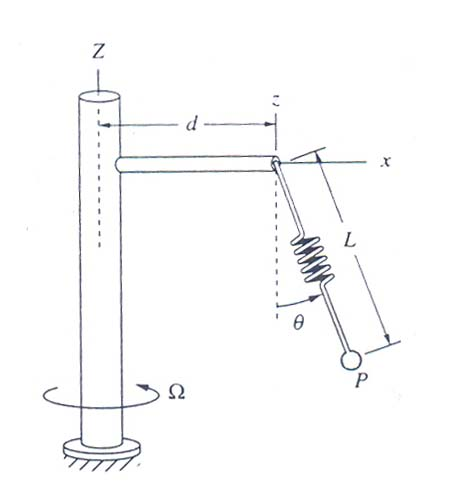

# Q5 -  Consider the particle that is constrained to move in a rotating hoop as shown in the figure below.  The mass of the bead is $m$ and the radius of the hoop is $r$. Neglecting friction derive the equations of motion of the bead if the bead is rotating at a constant angular velocity of $\omega$. Simulate its motion for various different initial conditions.
 



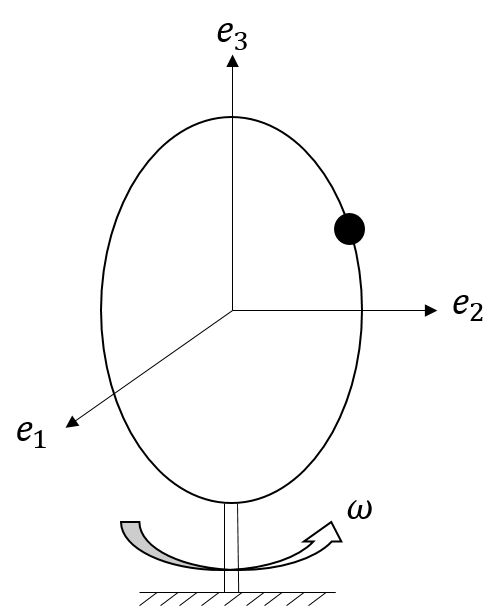

## Typical Answer

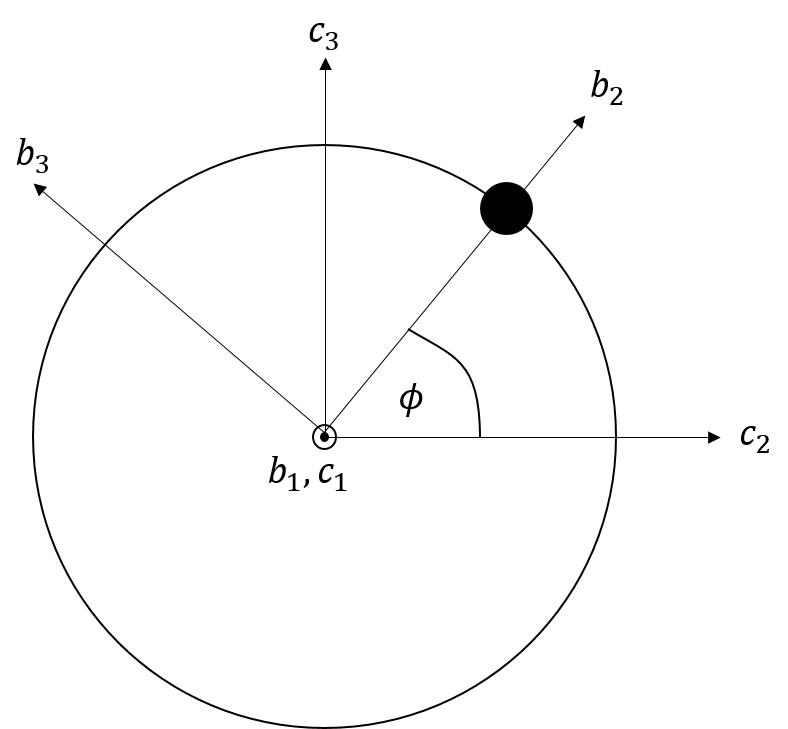

\begin{align}
\mathbf{c}&=\mathbf{e}\underbrace{\begin{bmatrix} \cos{\theta} &-\sin{\theta} &0\\
\sin{\theta} & \cos{\theta} & 0\\
0 & 0 & 1
\end{bmatrix}}_{R_3(\theta)}\\
\mathbf{b}&=\mathbf{c}\underbrace{\begin{bmatrix} 1 & 0 & 0\\0 & \cos{\phi} &-\sin{\phi}\\
0 & \sin{\phi} & \cos{\phi}
\end{bmatrix}}_{R_1(\phi)}
\end{align}
\begin{align}
OP=\mathbf{e}x=\mathbf{b}\underbrace{\begin{bmatrix} 0\\ r\\0
\end{bmatrix}}_{X}=\mathbf{e}\,{R_3(\theta)R_1(\phi)}\,X
\end{align}
Force acting on the bead.
\begin{align}
\mathbf{b}F=\mathbf{b}\underbrace{\begin{bmatrix} N_1\\ N_2\\0
\end{bmatrix}}_{F_b}+\mathbf{c}\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}=\mathbf{b}\underbrace{\begin{bmatrix} N_1\\ N_2\\0
\end{bmatrix}}_{F_b}+\mathbf{b}R_1^T(\phi)\underbrace{\begin{bmatrix} 0\\ 0\\-mg
\end{bmatrix}}_{f_g}
\end{align}

\begin{align}
\dot{x}&=R(\widehat{\Omega}X+\dot{X}),\\
\ddot{x}&=R(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}),\\
\end{align}

\begin{align}
\widehat{\Omega}&=R^T\dot{R}=\widehat{\Omega}_1+R_1^T\widehat{\Omega}_3R_1
\end{align}
Hence
\begin{align}
{\Omega}&={\Omega}_1+R_1^T{\Omega}_3=\begin{bmatrix}\dot{\phi} \\ \dot{\theta}\sin{\phi} \\ \dot{\theta}\cos{\phi}
\end{bmatrix}
\end{align}


In [ ]:
phi, dphi, ddphi, theta, dtheta, ddtheta, y, dy, ddy, r, m, k, g, N_1, N_2, N_3=symbols('phi, dphi, ddphi, theta, dtheta, ddtheta, y, dy, ddy, r, m, k, g, N_1, N_2, N_3');
R3=Matrix([[cos(theta), -sin(theta), 0],[sin(theta),cos(theta),0],[0,0,1]])
R1=Matrix([[1,0,0],[0, cos(phi), -sin(phi)],[0, sin(phi),cos(phi)]])
Omega3=Matrix([0,0,dtheta])
Omega1=Matrix([dphi,0,0])
hatOmega3=Matrix([[0, -dtheta, 0],[dtheta,0,0],[0,0,0]])
hatOmega1=Matrix([[0,0,0],[0,0,-dphi],[0,dphi,0]])
dhatOmega3=Matrix([[0, -ddtheta, 0],[ddtheta,0,0],[0,0,0]])
dhatOmega1=Matrix([[0,0,0],[0,0,-ddphi],[0,ddphi,0]])
X=Matrix([0,r,0]);
F_b=Matrix([N_1,N_2,0]);
f_g=Matrix([0,0,-m*g])

In [ ]:
R=R3 @ R1

In [ ]:
hatOmega=hatOmega1+R1.T@hatOmega3@R1

In [ ]:
hatOmega

Matrix([
[               0, -dtheta*cos(phi), dtheta*sin(phi)],
[ dtheta*cos(phi),                0,           -dphi],
[-dtheta*sin(phi),             dphi,               0]])

In [ ]:
dhatOmega=dhatOmega1+R1.T@dhatOmega3@R1-hatOmega1@R1.T@hatOmega3@R1+R1.T@hatOmega3@R1@hatOmega1

In [ ]:
dhatOmega

Matrix([
[                                       0, -ddtheta*cos(phi) + dphi*dtheta*sin(phi), ddtheta*sin(phi) + dphi*dtheta*cos(phi)],
[ ddtheta*cos(phi) - dphi*dtheta*sin(phi),                                        0,                                  -ddphi],
[-ddtheta*sin(phi) - dphi*dtheta*cos(phi),                                    ddphi,                                       0]])

*Newton's Equations*
\begin{align}
m(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X})=F
\end{align}

In [ ]:
hatOmega**2@ X+dhatOmega@X

Matrix([
[dphi*dtheta*r*sin(phi) + r*(-ddtheta*cos(phi) + dphi*dtheta*sin(phi))],
[                                 r*(-dphi**2 - dtheta**2*cos(phi)**2)],
[                              ddphi*r + dtheta**2*r*sin(phi)*cos(phi)]])

In [ ]:
F=F_b+R1.T@ f_g

In [ ]:
F

Matrix([
[               N_1],
[N_2 - g*m*sin(phi)],
[     -g*m*cos(phi)]])

In [ ]:
latex(hatOmega**2@ X+dhatOmega@X)

'\\left[\\begin{matrix}dphi dtheta r \\sin{\\left(\\phi \\right)} + r \\left(- ddtheta \\cos{\\left(\\phi \\right)} + dphi dtheta \\sin{\\left(\\phi \\right)}\\right)\\\\r \\left(- dphi^{2} - dtheta^{2} \\cos^{2}{\\left(\\phi \\right)}\\right)\\\\ddphi r + dtheta^{2} r \\sin{\\left(\\phi \\right)} \\cos{\\left(\\phi \\right)}\\end{matrix}\\right]'

In [ ]:
latex(F)

'\\left[\\begin{matrix}N_{1}\\\\N_{2} - g m \\sin{\\left(\\phi \\right)}\\\\- g m \\cos{\\left(\\phi \\right)}\\end{matrix}\\right]'

\begin{align}
m\left[\begin{matrix}r\dot{\phi} \dot{\theta}\sin{\left(\phi \right)} + r \left(- \ddot{\theta} \cos{\left(\phi \right)} + \dot{\phi} \dot{\theta} \sin{\left(\phi \right)}\right)\\r \left(- \dot{\phi}^{2} - \dot{\theta}^{2} \cos^{2}{\left(\phi \right)}\right)\\ \ddot{\phi} r + \dot{\theta}^{2} r \sin{\left(\phi \right)} \cos{\left(\phi \right)}\end{matrix}\right]=
\left[\begin{matrix}N_{1}\\N_2- mg \sin{\left(\phi \right)} \\- mg  \cos{\left(\phi \right)}\end{matrix}\right]
\end{align}


In [ ]:
def beadInHoop(X, t, sysParameters):
  phi=X[0]; dphi=X[1]; theta=X[2]; dtheta=X[3]
  m=sysParameters[0]; r=sysParameters[1]; 
  ddtheta=sysParameters[2];
  g=1;
  dXdt=[dphi,-dtheta**2*sin(phi)*cos(phi)-g*cos(phi)/r, dtheta, ddtheta];
  return dXdt

In [ ]:
m=0.01; r=1; dtheta0=np.pi; dphi0=np.pi; ddtheta=0.;
[t,sol,fig]=md.simulateDySystem(beadInHoop, 5,0.02, [0,dphi0,0,dtheta0], [m,r,ddtheta], 'y(t) and \dot{y}(t) Vs t', 'Time / t', 'x')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  phi=sol[i][0]; theta=sol[i][2];
  R3=np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
  R1=np.array([[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),-np.cos(phi)]])
  R=R3 @ R1;
  XX[i,:]=R @ [0,r,0];

In [ ]:
fig=md.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion in the e-frame')

In [ ]:
x_1, y_1, z_1, x_2, y_2, z_2=symbols('x_1, y_1, z_1, x_2, y_2, z_2')

In [ ]:
A=Matrix([x_1,y_1,z_1]);
B=Matrix([x_2,y_2,z_2]);

In [ ]:
A.cross(B)

Matrix([
[ y_1*z_2 - y_2*z_1],
[-x_1*z_2 + x_2*z_1],
[ x_1*y_2 - x_2*y_1]])